# [Lab Session 3](fourier.ipynb)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from PIL import Image

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [3]:
cell_img = plt.imread('data/cells.png')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


<class 'numpy.ndarray'>


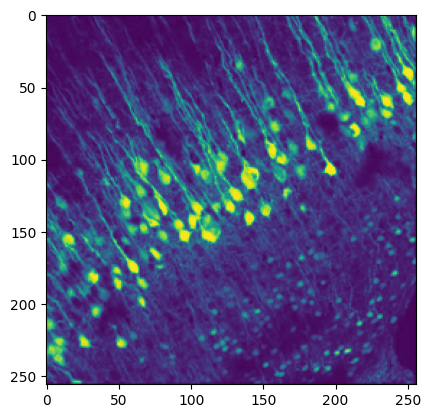

In [33]:
cell_img = np.array(cell_img)
#converting array of image intensities into PIL format so that we can apply the resize function
cell_img_pil= Image.fromarray((cell_img*255).astype(np.uint8))
cell_img_resize=np.array(cell_img_pil.resize((256,256)))
print(type(cell_img_resize)) #type should be array, needed for the next function
plt.imshow(cell_img_resize)
cell_ft = np.fft.fft2(cell_img)


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [5]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

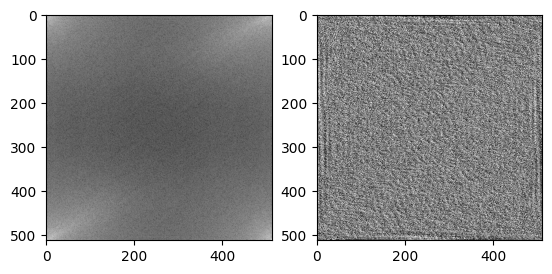

In [6]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


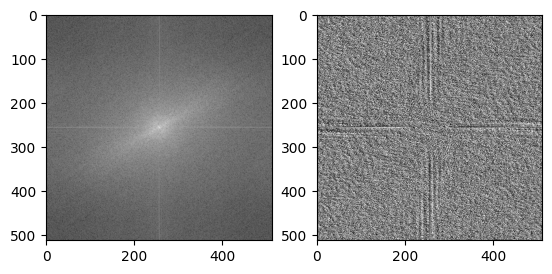

In [27]:
cell_ft_shift=np.fft.fftshift(cell_ft)
#extracting amplitude and phase
amplitude_shift = np.abs(cell_ft_shift)
phase_shift = np.angle(cell_ft_shift)
#show it
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


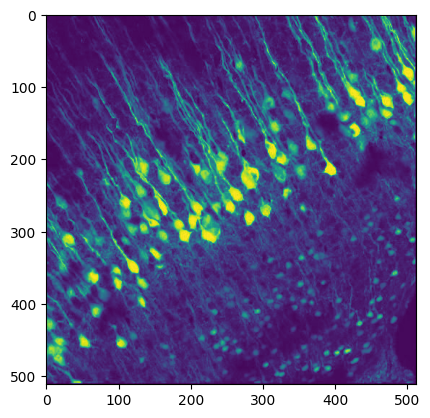

In [28]:
cell_ft_restored = np.fft.ifft2(np.fft.ifftshift(cell_ft_shift)).real
plt.imshow(cell_ft_restored)


---


**[Task 2 (a).]()** Load the brain CT image.


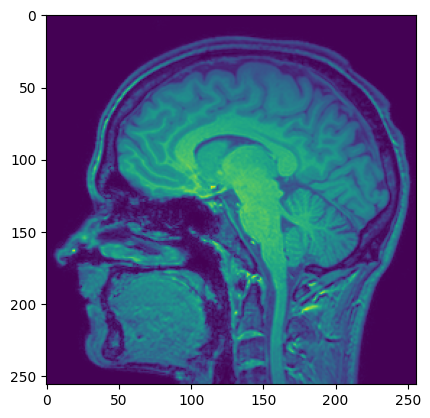

In [29]:
ct_image=plt.imread("data/brain_ct.png")
plt.imshow(ct_image)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


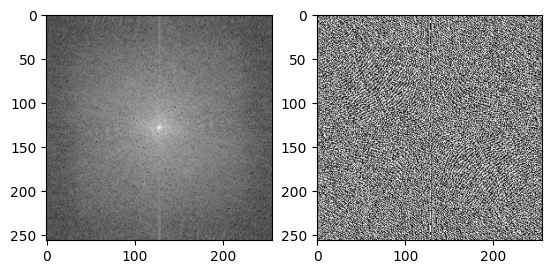

In [30]:
ct_image_fft=np.fft.fft2(ct_image)
ct_image_shifted=np.fft.fftshift(ct_image_fft)
amplitude_shift_ct = np.abs(ct_image_shifted)
phase_shift_ct = np.angle(ct_image_shifted)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift_ct), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift_ct, 'gray')

In [31]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [43]:
#merge
ct_shift_merge=to_complex_array(amplitude_shift_ct,phase_shift)

#IFFT and display
ct_ft_restored = np.fft.ifft2(np.fft.ifftshift(ct_shift_merge))
plt.imshow(ct_ft_restored)

ValueError: operands could not be broadcast together with shapes (256,256) (512,512) 

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [13]:
#merge
ct_shift_merge_cb=to_complex_array(amplitude_shift,phase_shift_ct)

#IFFT and display
ct_ft_restored_cb = np.fft.ifft2(np.fft.ifftshift(ct_shift_merge_cb)).real
plt.imshow(ct_ft_restored_cb)

ValueError: operands could not be broadcast together with shapes (512,512) (256,256) 

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [23]:
filter_window_size = (50, 50)
image_shape= (256,256)

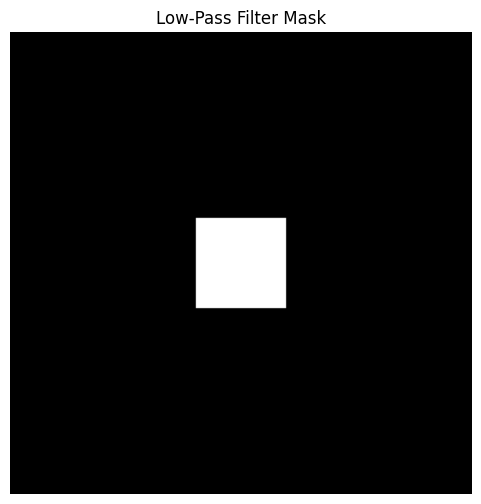

In [ ]:
low_pass_mask= np.zeros(image_shape)

# Calculate the coordinates for the center rectangle
center_x, center_y = image_shape[0] // 2, image_shape[1] // 2
half_window_x, half_window_y = filter_window_size[0] // 2, filter_window_size[1] // 2

# Insert the rectangle at the center
low_pass_mask[
    center_x - half_window_x : center_x + half_window_x,
    center_y - half_window_y : center_y + half_window_y,
] = 1

# Display the mask
plt.figure(figsize=(6, 6))
plt.imshow(low_pass_mask, cmap="gray")
plt.title("Low-Pass Filter Mask")
plt.axis("off")
plt.show()


**[Task 3 (b).]()** Create a highpass filter maks.


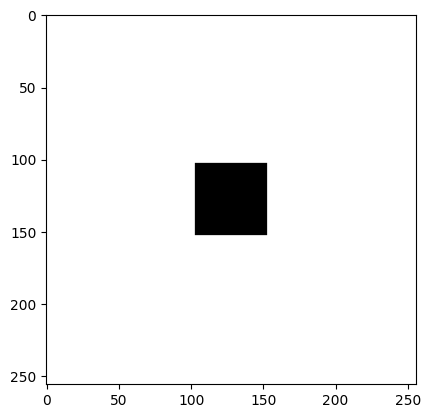

In [26]:
high_pass_mask=1-low_pass_mask
plt.imshow(high_pass_mask, "gray")

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


Text(0.5, 1.0, 'High pass filter')

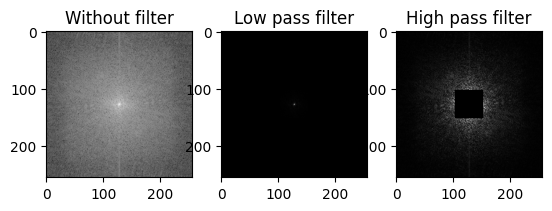

In [42]:
#apply to the amplitude
apply_mask_low=amplitude_shift_ct * low_pass_mask
apply_mask_high=amplitude_shift_ct * high_pass_mask
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.log(amplitude_shift_ct), "gray" )
plt.title("Without filter")
plt.subplot (1, 3, 2)
plt.imshow(apply_mask_low, "gray")
plt.title("Low pass filter")
plt.subplot(1, 3, 3)
plt.imshow(apply_mask_high, "gray")
plt.title("High pass filter")

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


Text(0.5, 1.0, 'High pass filter, m&r')

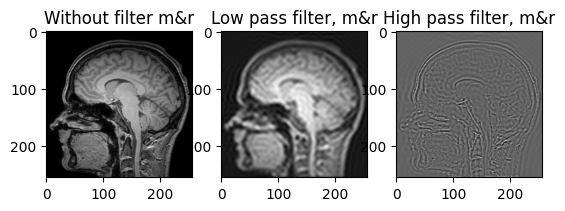

In [48]:
#merge
amplitude_filter_shift_merge=to_complex_array(amplitude_shift_ct,phase_shift_ct)
merged_result_high=to_complex_array(apply_mask_high,phase_shift_ct)
merged_result_low=to_complex_array(apply_mask_low,phase_shift_ct)
#recover
amplitude_recovered = np.fft.ifft2(np.fft.ifftshift(amplitude_filter_shift_merge)).real
amplitude_low_recovered=np.fft.ifft2(np.fft.ifftshift(merged_result_low)).real
amplitude_high_recovered=np.fft.ifft2(np.fft.ifftshift(merged_result_high)).real
plt.figure()
plt.subplot(1,3,1)
plt.imshow(amplitude_recovered, "gray" )
plt.title("Without filter m&r")
plt.subplot (1, 3, 2)
plt.imshow(amplitude_low_recovered, "gray")
plt.title("Low pass filter, m&r")
plt.subplot(1, 3, 3)
plt.imshow(amplitude_high_recovered, "gray")
plt.title("High pass filter, m&r")


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [96]:

def dft_function(img):
    M, N = img.shape
    dft = np.zeros((M, N), dtype=complex)
    
    for u in range(M):
        for v in range(N):
            # Initialize the sum for this particular (u, v)
            sum_value = 0
            for x in range(M-1):
                for y in range(N-1):
                    # Calculate the exponential term
                    exponent = -2j * np.pi * (u * x / M + v * y / N)
                    # Sum the product of the image value and the exponential term
                    sum_value += img[x, y] * np.exp(exponent)
            # Store the result in the DFT array
            dft[u, v] = sum_value / (M * N)
    
    return dft




**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [97]:
def inverse_fourier_transform(dft):
    m,n = dft.shape
    idft = np.zeros(dft.shape, dtype=complex)
    for u in range (m):
        for v in range(n):
            sum_values=0
            for x in range (m-1):
                for y in range (n-1):
                    # Calculate the exponential term
                    exponent = 2j * np.pi * (u * x / m + v * y / n)
                    # Sum the product of the image value and the exponential term
                    sum_values += dft[x, y] * np.exp(exponent)
                    # Store the result in the DFT array
            idft[u, v] = sum_values 
    return idft

Due to high computational costs, we need to resize the image.


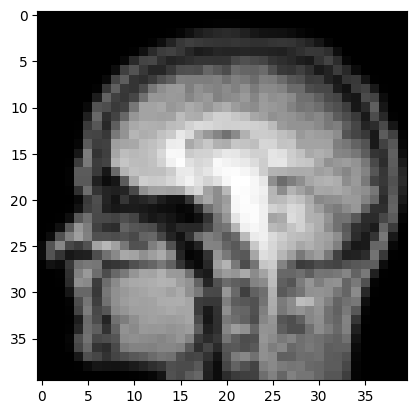

In [98]:
test_img = resize(ct_image, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


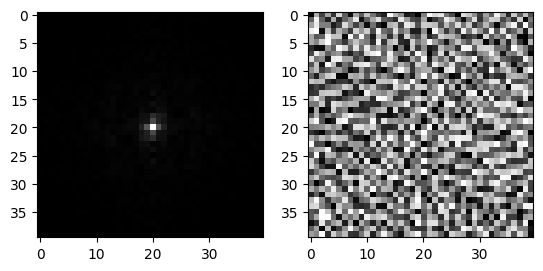

In [99]:
ct_image_dft=fourier_transform(test_img)
ct_image_dft_shift=np.fft.fftshift(ct_image_dft)
amplitude_dft=np.abs(ct_image_dft_shift)
phase_dft=np.angle(ct_image_dft_shift)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(amplitude_dft, "gray")
plt.subplot(1,2,2)
plt.imshow(phase_dft, "gray")


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


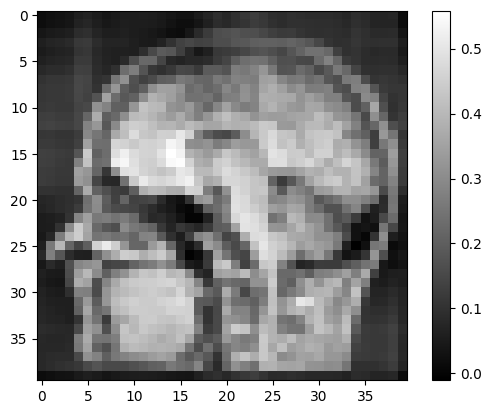

In [100]:
ct_image_idft= inverse_fourier_transform(ct_image_dft)
plt.imshow(np.real(ct_image_idft), cmap='gray')
plt.colorbar()
plt.show()

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [101]:
test_numpy_fft=np.fft.fft2(test_img, norm="forward")
np.allclose(test_numpy_fft, ct_image_dft)

False

**[Task 4 (f).]()** Round the arrays and compare them again.


In [ ]:
mean=np.mean(np.abs(ct_image_dft - test_numpy_fft))
print(mean)
#round
rounded_test_dft=np.round(test_img, 1)
rounded_numpy_dft=np.round(test_numpy_fft,1)
print(rounded_mean)

#compare

(rounded_test_dft == rounded_numpy_dft ). all()

0.0004074779429534757
0.00041


False

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [106]:
%timeit np.fft.fft2 (test_img)


30.3 μs ± 4.59 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [107]:
%timeit fourier_transform (test_img)

4.14 s ± 79.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
